In [1]:
import numpy as np
from keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
from main import Cnn

cnn = Cnn(x_train[:2000],y_train[:2000])

In [3]:
cnn.train(200)

[5 0 4 ... 5 2 0]
loss=2.3012294624329868
[3 0 9 ... 3 8 9]
0.1655
loss=2.1018389773820476
[2 0 4 ... 2 4 0]
0.3505
loss=3.04982162588353
[7 9 9 ... 9 1 9]
0.307
loss=1.7614782355427718
[5 0 4 ... 6 6 0]
0.443
loss=1.661759414842048
[3 0 4 ... 0 3 0]
0.4095
loss=1.5358931003082612
[3 0 4 ... 2 1 2]
0.437
loss=1.3014836465693524
[5 0 4 ... 5 1 0]
0.604
loss=1.2269661450130085
[5 0 4 ... 5 8 0]
0.538
loss=1.0205758186970357
[3 0 4 ... 5 8 0]
0.6805
loss=0.8846218081678119
[3 0 4 ... 0 8 0]
0.7195
loss=0.8163825052961717
[3 0 4 ... 0 1 0]
0.72
loss=0.7163547647363677
[3 0 4 ... 5 1 0]
0.783
loss=0.6684589775353355
[3 0 4 ... 5 1 0]
0.7845
loss=0.6278753523565258
[3 0 4 ... 5 8 0]
0.7995
loss=0.5752983118272692
[3 0 4 ... 5 2 0]
0.8235
loss=0.5331967492518745
[3 0 4 ... 5 2 0]
0.833
loss=0.49326245398608937
[3 0 4 ... 5 2 0]
0.8475
loss=0.45733611999648677
[3 0 4 ... 5 2 0]
0.8545
loss=0.4221222850376775
[3 0 4 ... 5 2 0]
0.873
loss=0.4023378482149563
[3 0 4 ... 5 2 0]
0.873
loss=0.3807894

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [17]:
res = cnn.activate(x_test[:3000],np.array([1]))

loss=11.886951805136482
[7 2 1 ... 1 4 0]
0.0


In [12]:
print(y_test[:3000])

[7 2 1 ... 1 4 0]


In [18]:
identical_values_count = np.sum(y_test[:3000] == res)
print(identical_values_count)
print(identical_values_count/3000)

2751
0.917


In [7]:
import os
from PIL import Image
import numpy as np

def process_image(filename):
    # Open the image
    image_pil = Image.open(filename)

    # Convert the image to grayscale
    image_pil_gray = image_pil.convert("L")

    # Resize the image to 28x28
    resized_image_gray = image_pil_gray.resize((28, 28))

    # Convert to a NumPy array
    return np.array(resized_image_gray)

# Directory containing the images
directory_path = './'  # Update this path

# Get list of all image filenames in the directory (assuming they are jpg or png for this example)
image_filenames = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith(('.jpg'))]

# Process each image and store in a list
images = [process_image(filename) for filename in image_filenames]

# Convert list of processed images to numpy array
images_array = np.array(images)

print(images_array.shape)  # This will print (num_of_images, 28, 28)

(6, 28, 28)


In [20]:
res_i = cnn.activate(images_array,np.array([2, 1 ,2 ,2,3 ,2]))

loss=5.135298763005353
[6 6 8 8 6 6]
0.0


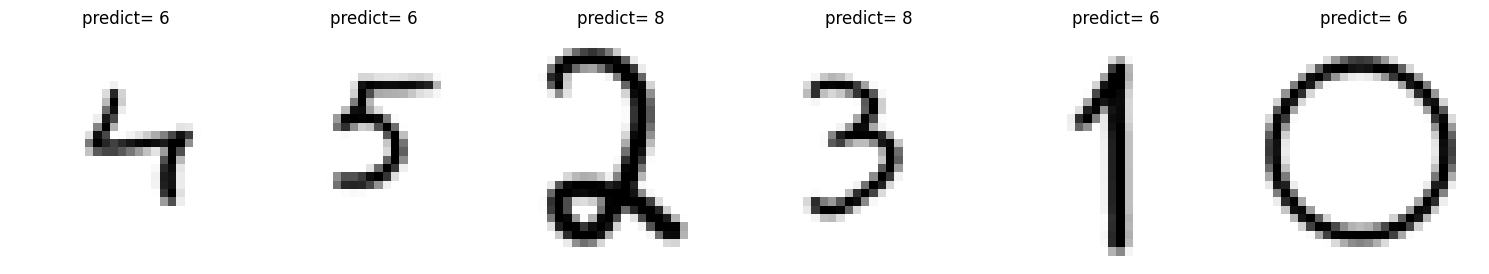

In [9]:
import matplotlib.pyplot as plt

# Sample labels array (replace this with your own labels)
labels = res_i  # This should have the same length as images_array

# Number of images to plot
num_images = images_array.shape[0]

# Create a grid of subplots
fig, axes = plt.subplots(int(num_images/6), 6, figsize=(15, 15))

for i, ax in enumerate(axes.ravel()):
    if i < num_images:
        ax.imshow(images_array[i], cmap='gray')
        ax.set_title(f"predict= {labels[i]}")
        ax.axis('off')
    else:
        ax.axis('off')  # Hide any extra subplots

plt.tight_layout()
plt.show()